## Packages

In [1]:
# pip install tensorflow

In [2]:
# pip install scikit-learn

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, models, layers

<hr>

## Dataset: CIFAR10

In [2]:
(x_train10, y_train10), (x_test10, y_test10) = datasets.cifar10.load_data()

In [3]:
x_train10.shape, y_train10.shape, x_test10.shape, y_test10.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

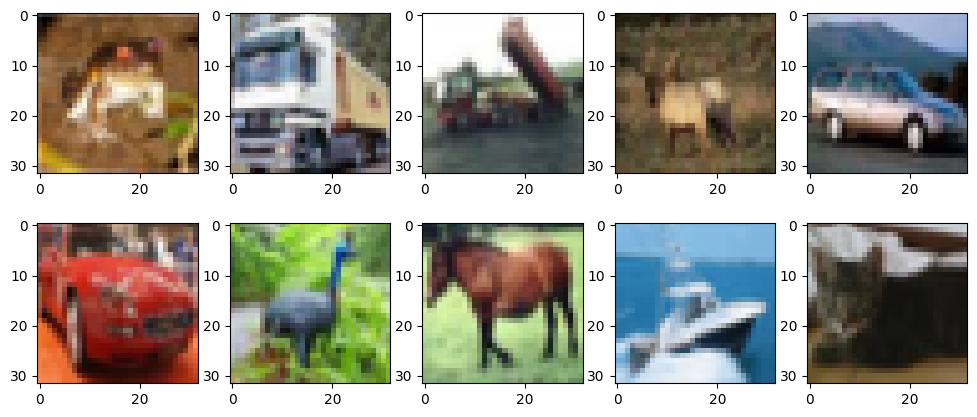

In [4]:
plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train10[i])

<hr>

## Normalization: Min-Max

In [5]:
x_train10[111].flatten()

array([135, 160, 179, ..., 139, 139, 140], dtype=uint8)

In [6]:
x_train10 = x_train10/255.0
x_test10  = x_test10 /255.0

In [7]:
x_train10[111].flatten()

array([0.52941176, 0.62745098, 0.70196078, ..., 0.54509804, 0.54509804,
       0.54901961])

<hr>

## Train-Test-Split: for Validation Set 

In [10]:
x_test10, x_val10, y_test10, y_val10 = train_test_split(x_test10, y_test10, test_size=0.5, random_state=111)

In [11]:
x_train10.shape[0], x_test10.shape[0], x_val10.shape[0]

(50000, 5000, 5000)

<hr>

## Model Building

#### Graphs: Generic code

In [12]:
def Graphs(accuracy, loss, val_accuracy, val_loss, epochs):
    # Create a figure and axis object
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    # Plot the first subplot (Training Accuracy)
    ax1.plot(epochs, accuracy, 'y', label='Training Accuracy')
    ax1.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    ax1.set_title('Accuracy Graph')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    # Plot the second subplot (Training Loss)
    ax2.plot(epochs, loss, 'y', label='Training Loss')
    ax2.plot(epochs, val_loss, 'r', label='Validation Loss')
    ax2.set_title('Loss Graph')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()
    # Adjust layout
    plt.tight_layout()
    # Show the figure
    plt.show()

### 1. Optimizer: SGD (model1)

In [13]:
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [14]:
model1.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [15]:
history = model1.fit(x_train10, y_train10, validation_data=(x_val10, y_val10), batch_size= 32, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 13s 6ms/step - loss: 2.2114 - accuracy: 0.1866 - val_loss: 2.0027 - val_accuracy: 0.2560
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8426 - accuracy: 0.3245 - val_loss: 1.7112 - val_accuracy: 0.3806
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5927 - accuracy: 0.4180 - val_loss: 1.5313 - val_accuracy: 0.4398
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4395 - accuracy: 0.4786 - val_loss: 1.6793 - val_accuracy: 0.4292
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3166 - accuracy: 0.5258 - val_loss: 1.3593 - val_accuracy: 0.5286


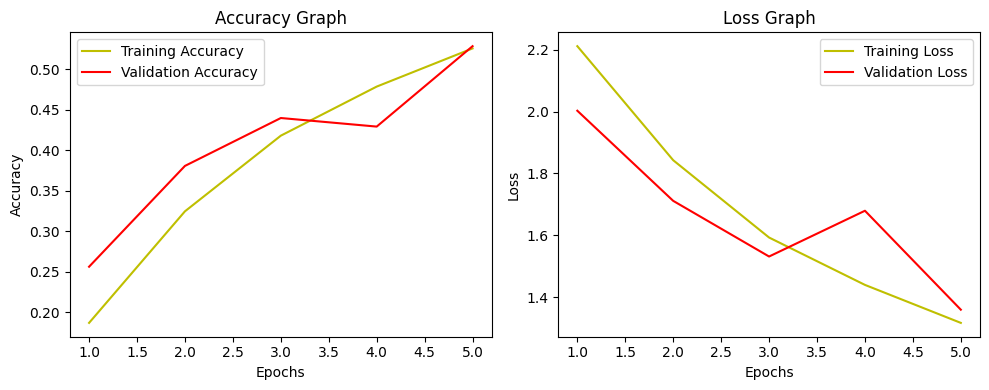

In [16]:
Graphs(history.history['accuracy'], history.history['loss'], history.history['val_accuracy'], history.history['val_loss'], range(1, len(history.history['accuracy'])+1))

### 2. Optimizer: Adam (model2)

In [17]:
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [18]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [19]:
history = model2.fit(x_train10, y_train10, validation_data=(x_val10, y_val10), batch_size= 32, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5703 - accuracy: 0.4176 - val_loss: 1.2703 - val_accuracy: 0.5364
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1589 - accuracy: 0.5877 - val_loss: 1.0684 - val_accuracy: 0.6194
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0078 - accuracy: 0.6446 - val_loss: 1.0596 - val_accuracy: 0.6342
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8974 - accuracy: 0.6878 - val_loss: 0.9631 - val_accuracy: 0.6678
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8168 - accuracy: 0.7142 - val_loss: 0.8961 - val_accuracy: 0.6828


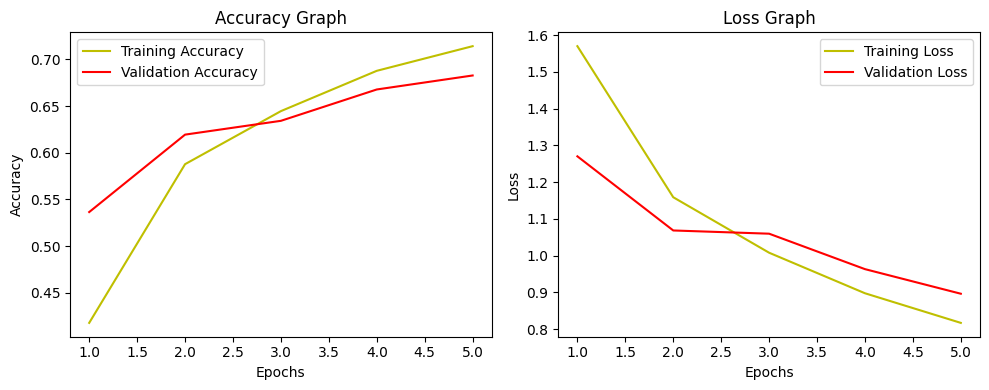

In [20]:
Graphs(history.history['accuracy'], history.history['loss'], history.history['val_accuracy'], history.history['val_loss'], range(1, len(history.history['accuracy'])+1))

<hr>

### 3. Increased Neurons: Conv2D (model3)

In [26]:
model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])

In [14]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [15]:
history = model3.fit(x_train10, y_train10, validation_data=(x_val10, y_val10), batch_size= 32, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 5ms/step - loss: 1.5966 - accuracy: 0.4348 - val_loss: 1.4160 - val_accuracy: 0.4958
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2104 - accuracy: 0.5887 - val_loss: 1.1213 - val_accuracy: 0.6084
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0265 - accuracy: 0.6523 - val_loss: 1.0458 - val_accuracy: 0.6382
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9102 - accuracy: 0.6966 - val_loss: 1.0701 - val_accuracy: 0.6322
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8047 - accuracy: 0.7320 - val_loss: 0.9429 - val_accuracy: 0.6920
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7321 - accuracy: 0.7550 - val_loss: 0.8918 - val_accuracy: 0.7034
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6635 - accuracy: 0.7778 - val_loss: 0.8947 - val_accuracy

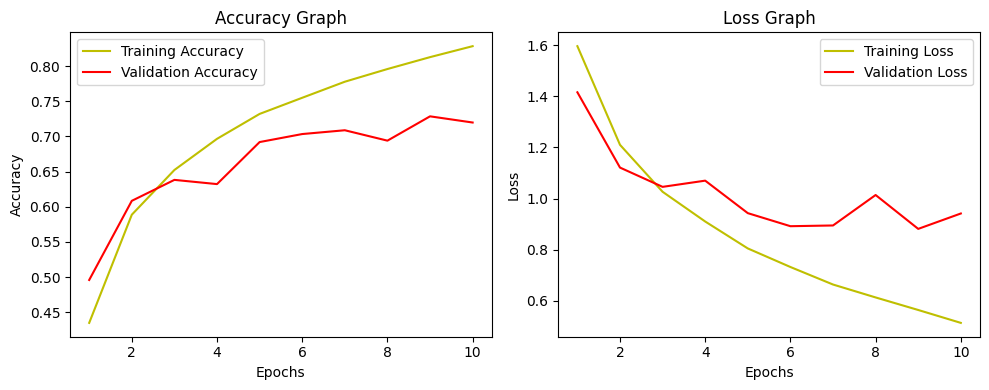

In [16]:
Graphs(history.history['accuracy'], history.history['loss'], history.history['val_accuracy'], history.history['val_loss'], range(1, len(history.history['accuracy'])+1))

<hr>

## Model Evaluation

In [21]:
model1.evaluate(x_test10, y_test10)

157/157 [==============================] - 1s 5ms/step - loss: 1.3588 - accuracy: 0.5254


[1.358797311782837, 0.5253999829292297]

In [22]:
model2.evaluate(x_test10, y_test10)

157/157 [==============================] - 0s 3ms/step - loss: 0.9142 - accuracy: 0.6826


[0.9142114520072937, 0.6826000213623047]

In [17]:
model3.evaluate(x_test10, y_test10)

157/157 [==============================] - 1s 5ms/step - loss: 0.9263 - accuracy: 0.7194


[0.9263463616371155, 0.7193999886512756]

#### Classification Report

In [18]:
prediction = model3.predict(x_test10)
y_pred     = [np.argmax(i) for i in prediction]
print(classification_report(y_test10, y_pred))

157/157 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       491
           1       0.91      0.77      0.84       478
           2       0.70      0.49      0.58       500
           3       0.56      0.48      0.52       532
           4       0.64      0.71      0.67       467
           5       0.60      0.70      0.64       497
           6       0.73      0.86      0.79       524
           7       0.84      0.75      0.79       502
           8       0.80      0.81      0.81       497
           9       0.79      0.83      0.81       512

    accuracy                           0.72      5000
   macro avg       0.72      0.72      0.72      5000
weighted avg       0.72      0.72      0.72      5000



<hr>

## Save Model

In [ ]:
# model3.save('CIPHAR10.h5') # CIFAR10

<hr>

## Predictions

In [10]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
model = models.load_model('CIPHAR10.h5')

In [32]:
image = x_train10[15]
label = y_train10.reshape(-1)[15]
image = tf.expand_dims(image, axis=0)
original_class = classes[label]
print('Original Class: ',original_class)

Original Class:  truck


In [33]:
prediction  = model.predict(image)
class_index = np.argmax(prediction)
print('Predicted Class: ',classes[class_index])

1/1 [==============================] - 0s 29ms/step
Predicted Class:  truck


<hr>

In [34]:
def ClassifyImage():
    path = str(input('Enter Path of Image: '))
    img  = tf.io.read_file(path)
    img  = tf.image.decode_jpeg(img, channels=3)
    plt.imshow(img)
    img  = tf.image.resize(img, [32,32])
    img  = img / 255.0
    img  = tf.expand_dims(img, axis=0)
    # Model: image classification
    probabilities = model.predict(img)
    max_index = np.argmax(probabilities)
    label= classes[max_index]
    print(f"\u2022 Image '{path}' belongs to class: {label}")

Enter Path of Image:  Datasets/ship.jpg


1/1 [==============================] - 0s 32ms/step
• Image 'Datasets/ship.jpg' belongs to class: ship


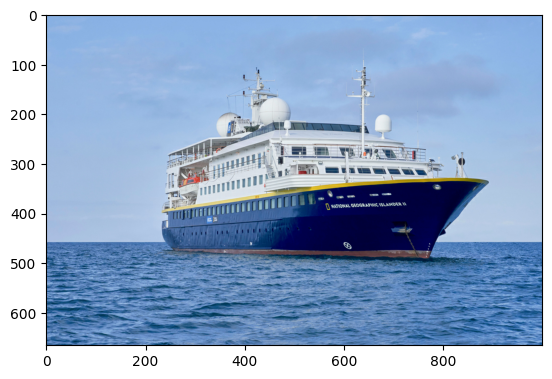

In [25]:
ClassifyImage()

Enter Path of Image:  Datasets/cat.jpeg


1/1 [==============================] - 0s 22ms/step
• Image 'Datasets/cat.jpeg' belongs to class: cat


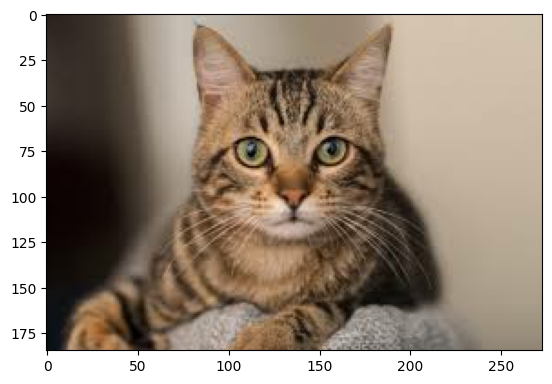

In [29]:
ClassifyImage()

<hr>